In [1]:
import gym
from shinrl import DiscreteViSolver
import matplotlib.pyplot as plt

# DQN QuickStart

![QuickStart](../assets/quickstart.png)

In [2]:
# make an env & a config
env = gym.make("ShinPendulum-v0")
config = DiscreteViSolver.DefaultConfig(explore="eps_greedy", approx="nn", steps_per_epoch=10000)

/home/rl-dqn/miniconda3/envs/shinrl-jax/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:6461: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "astype")


In [3]:
# make mixins
mixins = DiscreteViSolver.make_mixins(env, config)
mixins

[shinrl.solvers.vi.discrete.core.step_mixin.DeepRlStepMixIn,
 shinrl.solvers.vi.discrete.core.target_mixin.QTargetMixIn,
 shinrl.solvers.vi.discrete.core.tb_mixin.TbInitMixIn,
 shinrl.solvers.vi.discrete.core.net_mixin.NetActMixIn,
 shinrl.solvers.vi.discrete.core.net_mixin.NetInitMixIn,
 shinrl.solvers.base.core.mixin.ShinExploreMixIn,
 shinrl.solvers.base.core.mixin.ShinEvalMixIn,
 shinrl.solvers.vi.discrete.solver.DiscreteViSolver]

In [4]:
# make & run a solver
dqn_solver = DiscreteViSolver.factory(env, config, mixins)
dqn_solver.run()

2021-12-03T05:06:04.553116Z set_config is called.          config={'seed': 0, 'discount': 0.99, 'eval_trials': 10, 'eval_interval': 100, 'add_interval': 100, 'steps_per_epoch': 10000, 'explore': <EXPLORE.eps_greedy: 2>, 'exploit': <EXPLOIT.greedy: 2>, 'approx': <APPROX.nn: 2>, 'lr': 0.001, 'num_samples': 4, 'buffer_size': 1000000, 'batch_size': 32, 'er_coef': 0.0, 'kl_coef': 0.0, 'logp_clip': -100000000.0, 'use_double_q': False, 'eps_end': 0.1, 'eps_warmup': 0, 'eps_decay': 100000, 'max_tmp': 1.0, 'hidden': 128, 'depth': 2, 'target_update_interval': 1000, 'activation': <ACTIVATION.relu: 15>, 'optimizer': <OPTIMIZER.adam: 11>, 'loss_fn': <LOSS.l2_loss: 5>} env_id=None solver_id=MixedSolver-0
2021-12-03T05:06:04.969958Z set_env is called.             env_id=0 solver_id=MixedSolver-0
2021-12-03T05:06:04.971657Z Solver is initialized.         env_id=0 methods=['Solver.__init__', 'History.add_scalar', 'ShinExploreMixIn.collect_samples', 'ShinEvalMixIn.evaluate', 'History.init_history', 'Dee

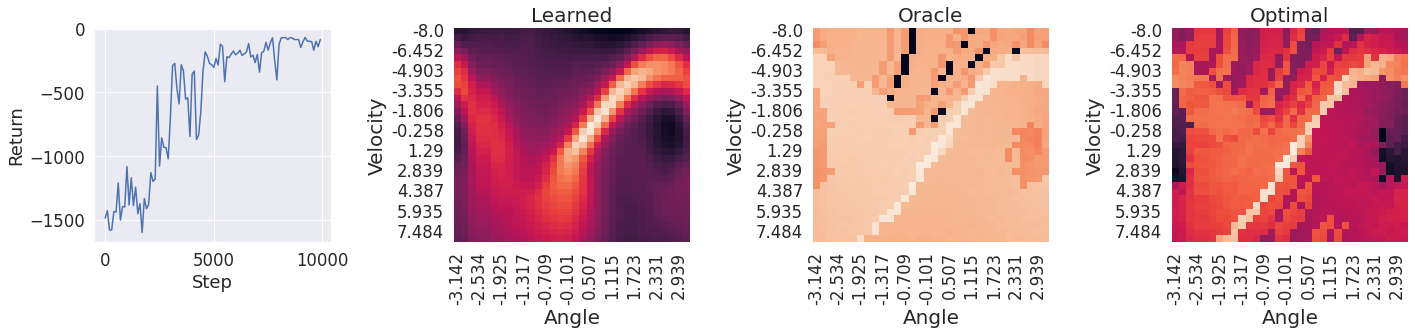

In [5]:
import seaborn as sns
grid_kws = {"width_ratios": (0.25, 0.25, 0.25, 0.25)}
sns.set(font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), gridspec_kw=grid_kws)


# plot performance
returns = dqn_solver.scalars["Return"]
axes[0].plot(returns["x"], returns["y"])
axes[0].set_ylabel("Return")
axes[0].set_xlabel("Step")

# plot learned q-values  (act == 0)
q0 = dqn_solver.tb_dict["Q"][:, 0]
env.plot_S(q0, title="Learned", ax=axes[1], fontsize=20)

# plot oracle q-values  (act == 0)
q0 = env.calc_q(dqn_solver.tb_dict["ExploitPolicy"])[:, 0]
env.plot_S(q0, title="Oracle", ax=axes[2], fontsize=20)

# plot optimal q-values  (act == 0)
q0 = env.calc_optimal_q()[:, 0]
env.plot_S(q0, title="Optimal", ax=axes[3], fontsize=20)

plt.tight_layout()

# Arrange Mixins

![MixIn](../assets/MixIn.png)

In [6]:
# (optional) arrange mixins
# Insert a mixin that scale computed Q-targets as an example:

class ScaleQMixIn:
    def target_deep_rl(self, prms_dict, samples):
        q_targ = super().target_deep_rl(prms_dict, samples)
        return q_targ * 0.1
    
mixins.insert(1, ScaleQMixIn)
mixins

[shinrl.solvers.vi.discrete.core.step_mixin.DeepRlStepMixIn,
 __main__.ScaleQMixIn,
 shinrl.solvers.vi.discrete.core.target_mixin.QTargetMixIn,
 shinrl.solvers.vi.discrete.core.tb_mixin.TbInitMixIn,
 shinrl.solvers.vi.discrete.core.net_mixin.NetActMixIn,
 shinrl.solvers.vi.discrete.core.net_mixin.NetInitMixIn,
 shinrl.solvers.base.core.mixin.ShinExploreMixIn,
 shinrl.solvers.base.core.mixin.ShinEvalMixIn,
 shinrl.solvers.vi.discrete.solver.DiscreteViSolver]

In [7]:
# make & run a solver
dqn_solver = DiscreteViSolver.factory(env, config, mixins)
dqn_solver.run()

2021-12-03T05:06:37.052020Z set_config is called.          config={'seed': 0, 'discount': 0.99, 'eval_trials': 10, 'eval_interval': 100, 'add_interval': 100, 'steps_per_epoch': 10000, 'explore': <EXPLORE.eps_greedy: 2>, 'exploit': <EXPLOIT.greedy: 2>, 'approx': <APPROX.nn: 2>, 'lr': 0.001, 'num_samples': 4, 'buffer_size': 1000000, 'batch_size': 32, 'er_coef': 0.0, 'kl_coef': 0.0, 'logp_clip': -100000000.0, 'use_double_q': False, 'eps_end': 0.1, 'eps_warmup': 0, 'eps_decay': 100000, 'max_tmp': 1.0, 'hidden': 128, 'depth': 2, 'target_update_interval': 1000, 'activation': <ACTIVATION.relu: 15>, 'optimizer': <OPTIMIZER.adam: 11>, 'loss_fn': <LOSS.l2_loss: 5>} env_id=None solver_id=MixedSolver-1
2021-12-03T05:06:37.053210Z set_env is called.             env_id=0 solver_id=MixedSolver-1
2021-12-03T05:06:37.054750Z Solver is initialized.         env_id=0 methods=['Solver.__init__', 'History.add_scalar', 'ShinExploreMixIn.collect_samples', 'ShinEvalMixIn.evaluate', 'History.init_history', 'Dee

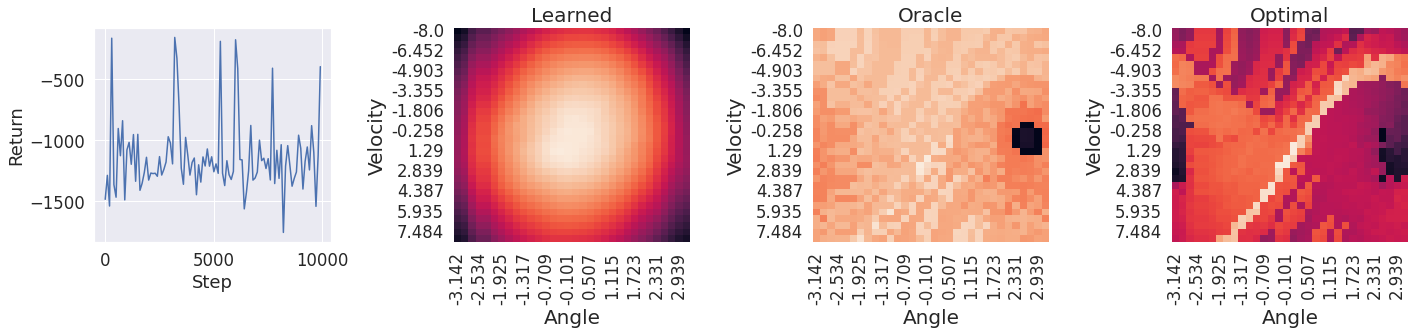

In [8]:
import seaborn as sns
grid_kws = {"width_ratios": (0.25, 0.25, 0.25, 0.25)}
sns.set(font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), gridspec_kw=grid_kws)


# plot performance
returns = dqn_solver.scalars["Return"]
axes[0].plot(returns["x"], returns["y"])
axes[0].set_ylabel("Return")
axes[0].set_xlabel("Step")

# plot learned q-values  (act == 0)
q0 = dqn_solver.tb_dict["Q"][:, 0]
env.plot_S(q0, title="Learned", ax=axes[1], fontsize=20)

# plot oracle q-values  (act == 0)
q0 = env.calc_q(dqn_solver.tb_dict["ExploitPolicy"])[:, 0]
env.plot_S(q0, title="Oracle", ax=axes[2], fontsize=20)

# plot optimal q-values  (act == 0)
q0 = env.calc_optimal_q()[:, 0]
env.plot_S(q0, title="Optimal", ax=axes[3], fontsize=20)

plt.tight_layout()